#  #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

Data Source - https://www.kaggle.com/blastchar/telco-customer-churn

In this project, we will train several classification algorithms such as Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Random Forest Classifier to predict the churn rate of Telecommunication Customers. Machine learning help companies analyze customer churn rate based on several factors such as services subscribed by customers, tenure rate, and payment method. 

#  #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [17]:
#!pip install cufflinks
#!pip install jupyterthemes
#!pip install plotly
# Cufflinks is a third-party wrapper library around Plotly

In [18]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
#from jupyterthemes import jtplot # Jupyter theme
#jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [19]:
# Read the CSV file 
telecom_df=pd.read_csv('telecom_churn (1).csv')


In [20]:
# Load the top 5 instances
telecom_df.head()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [21]:
# Load the bottom 5 instances 
telecom_df.tail()




,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [22]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [23]:
# Display the feature columns
telecom_df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [24]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [25]:
print(telecom_df['total_day_minutes'].mean(),telecom_df['total_day_minutes'].max())

180.2888999999998 351.5


#  #3: PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'area_code'}>,
        <AxesSubplot:title={'center':'phone_number'}>,
        <AxesSubplot:title={'center':'international_plan'}>],
       [<AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>],
       [<AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>],
       [<AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>,
    

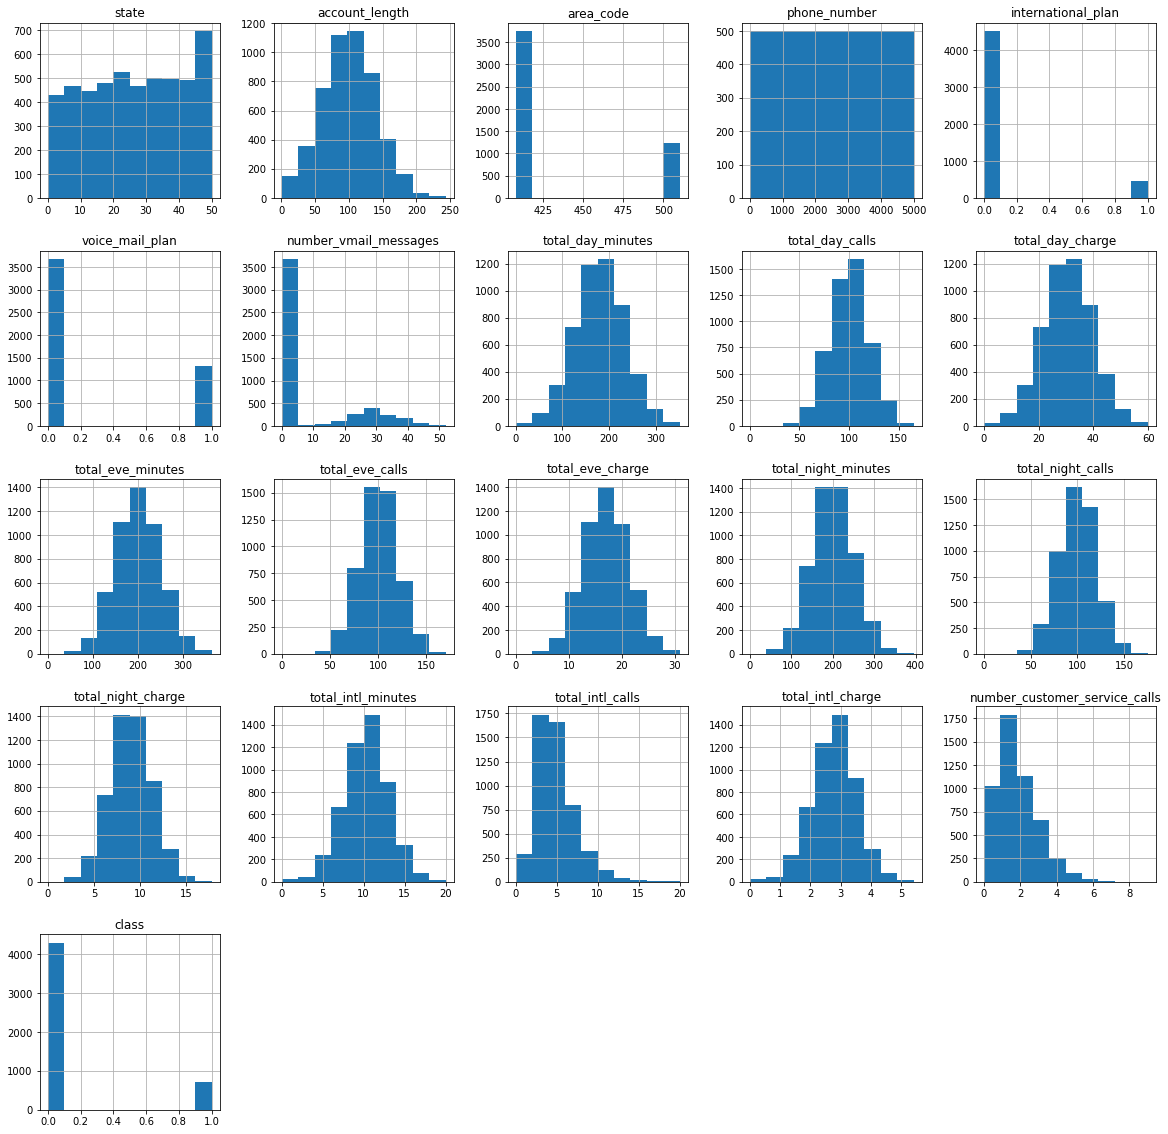

In [26]:
telecom_df.hist(figsize=(20,20))

In [27]:
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [28]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig=go.Figure(data= [go.Pie(labels=['Retained(0)','Exited(1)'],values=telecom_df['class'].value_counts())])
fig.show()


In [29]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig=px.histogram(telecom_df,x='international_plan')
fig.show()


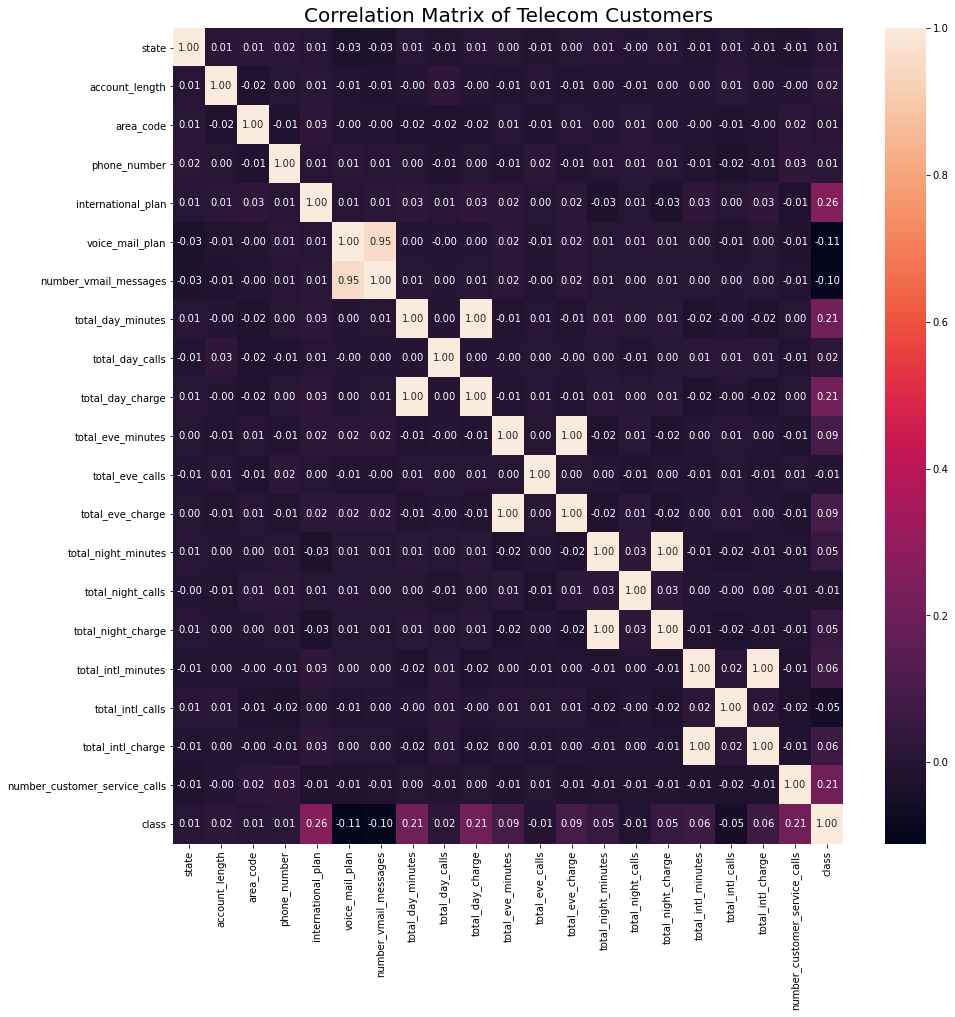

In [30]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

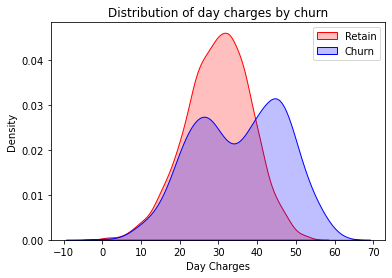

In [31]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

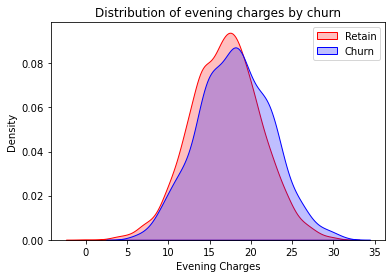

In [32]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

MINI CHALLENGE #3:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [33]:
fig=px.histogram(telecom_df,x='voice_mail_plan',color='class')
fig.show()

# #4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [34]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y
#telecom_df = pd.concat([telecom_df,pd.get_dummies(telecom_df['state'])],axis = 1)
#telecom_df = telecom_df.drop('state',axis = 1)
X = telecom_df.drop(["class", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [35]:
X.shape

(5000, 19)

In [36]:
y.shape

(5000,)

In [37]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

MINI CHALLENGE #4:
- Verify that the train/test split was successfull 

In [38]:
X_train.shape

(4000, 19)

In [39]:
y_train.head()

2979    1
2997    0
1797    0
2716    0
3298    0
Name: class, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

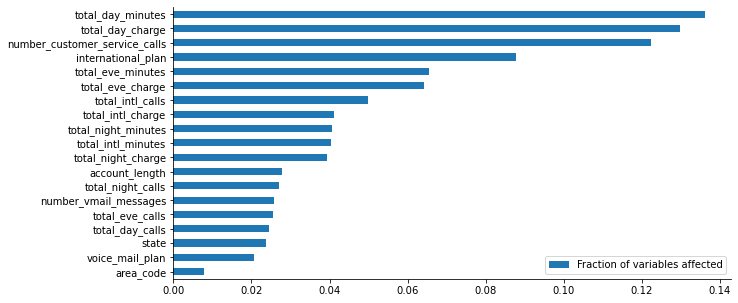

In [41]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescores=pd.concat([dfscores,dfcolumns],axis=1)
featurescores.columns=['Score','Specs']
featurescores.index=featurescores['Specs']
del featurescores['Specs']
featurescores=featurescores.sort_values(by='Score',ascending=False)

featurescores




,Score
Specs,
total_day_minutes,2404.193941
number_vmail_messages,791.471572
total_eve_minutes,435.337557
total_day_charge,408.669121
international_plan,264.877927
number_customer_service_calls,215.325718
total_night_minutes,159.434267
account_length,42.766801
total_eve_charge,36.997625


In [43]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

#  #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
model_LR=LogisticRegression(max_iter=5000)
model_LR=CalibratedClassifierCV(model_LR)
model_LR.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(max_iter=5000))

In [45]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
y_predict=model_LR.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       853
           1       0.59      0.16      0.26       147

    accuracy                           0.86      1000
   macro avg       0.73      0.57      0.59      1000
weighted avg       0.83      0.86      0.82      1000



In [46]:
cm=confusion_matrix(y_test,y_predict)
print(cm)


[[836  17]
 [123  24]]


Heatmap


<AxesSubplot:>

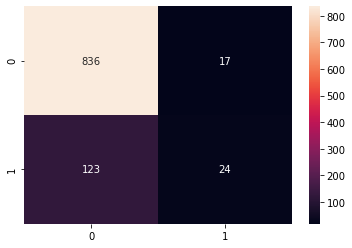

In [47]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko


#  #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [48]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC
model_svm=LinearSVC(max_iter=10000, dual=False)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)


CalibratedClassifierCV(base_estimator=LinearSVC(dual=False, max_iter=10000))

In [49]:
y_predict=model_svm.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       853
           1       0.52      0.16      0.24       147

    accuracy                           0.85      1000
   macro avg       0.70      0.57      0.58      1000
weighted avg       0.82      0.85      0.82      1000



In [50]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[832  21]
 [124  23]]


<AxesSubplot:>

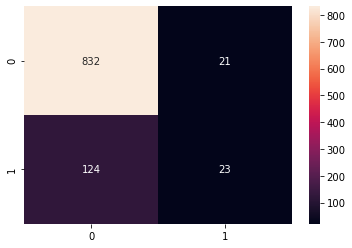

In [51]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko

# TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf=CalibratedClassifierCV(model_rf)
model_rf.fit(X_train,y_train)
y_predict=model_rf.predict(X_test)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       853
           1       0.90      0.78      0.83       147

    accuracy                           0.95      1000
   macro avg       0.93      0.88      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [53]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[840  13]
 [ 33 114]]


<AxesSubplot:>

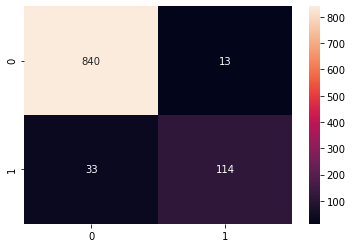

In [54]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko

#  #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=9)
#model_knn=CalibratedClassifierCV(model_knn)
model_knn.fit(X_train,y_train)
y_predict=model_knn.predict(X_test)
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)


              precision    recall  f1-score   support

           0       0.89      0.99      0.93       853
           1       0.78      0.27      0.40       147

    accuracy                           0.88      1000
   macro avg       0.84      0.63      0.67      1000
weighted avg       0.87      0.88      0.86      1000

[[842  11]
 [107  40]]


In [56]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    #knn=CalibratedClassifierCV(knn)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    print(i,score.mean())
    accuracy_rate.append(score.mean())


1 0.8217500000000001
2 0.87425
3 0.86575
4 0.882
5 0.87525
6 0.8815
7 0.8805
8 0.8817499999999999
9 0.88225
10 0.88225
11 0.88575
12 0.8825
13 0.8825
14 0.8800000000000001
15 0.8825
16 0.8800000000000001
17 0.8807500000000001
18 0.8790000000000001
19 0.88025
20 0.8785000000000001
21 0.8787499999999999
22 0.8772499999999999
23 0.8795
24 0.8772500000000001
25 0.8780000000000001
26 0.87525
27 0.87675
28 0.875
29 0.87625
30 0.87475
31 0.876
32 0.8735000000000002
33 0.87425
34 0.873
35 0.87425
36 0.873
37 0.8734999999999999
38 0.873
39 0.8735000000000002


#  #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
y_predict=model_gnb.predict(X_test)
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)



              precision    recall  f1-score   support

           0       0.92      0.92      0.92       853
           1       0.53      0.53      0.53       147

    accuracy                           0.86      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.86      0.86      0.86      1000

[[785  68]
 [ 69  78]]


#  #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

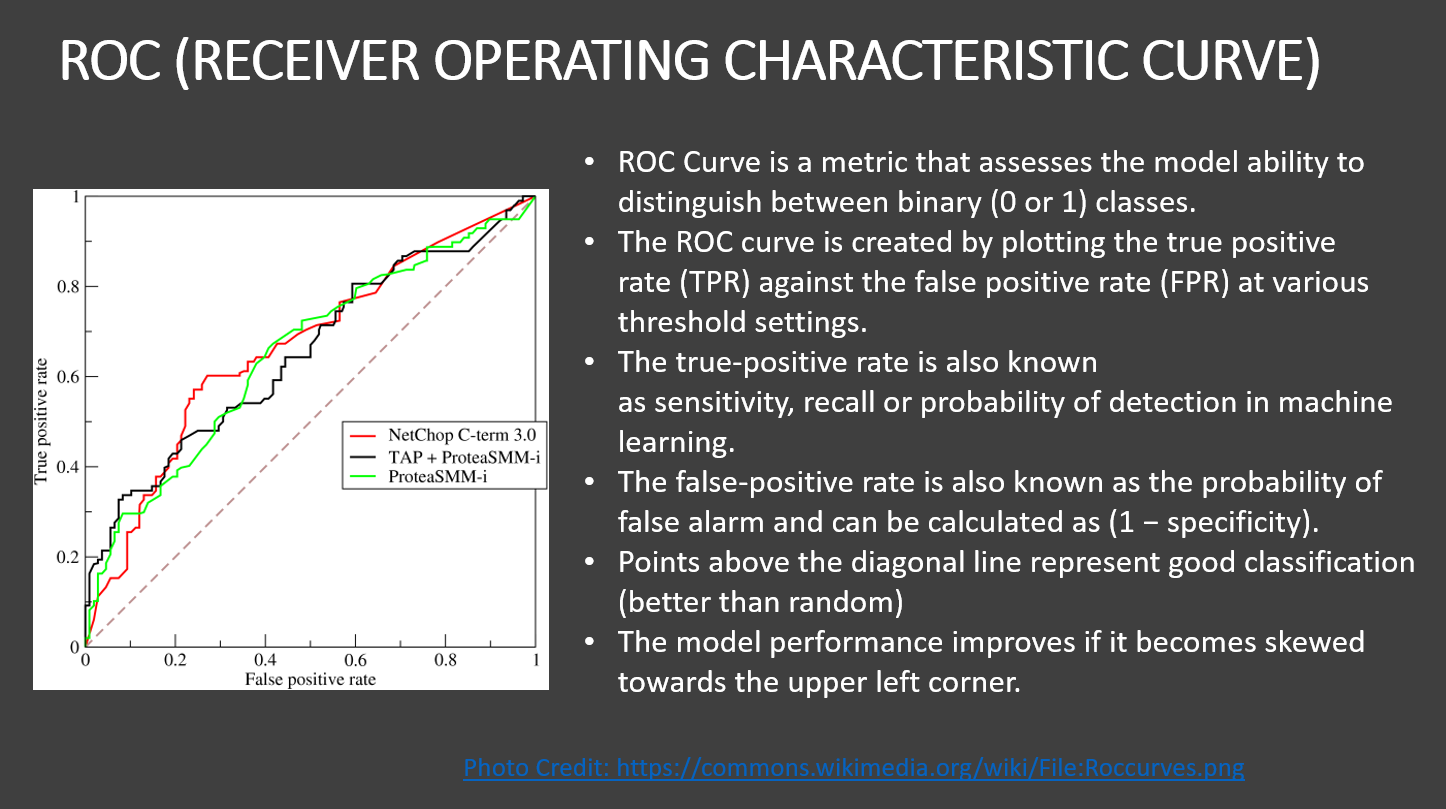

In [59]:
model_LR.predict_proba(X_test)

array([[0.35359525, 0.64640475],
       [0.97923966, 0.02076034],
       [0.91812816, 0.08187184],
       ...,
       [0.79073355, 0.20926645],
       [0.92117638, 0.07882362],
       [0.97210601, 0.02789399]])

In [60]:
model_LR.predict_proba(X_test)[:, 1]

array([0.64640475, 0.02076034, 0.08187184, 0.03151145, 0.07101796,
       0.04542649, 0.10171005, 0.17092854, 0.1286884 , 0.70473609,
       0.07560581, 0.12203623, 0.02614518, 0.54487445, 0.08623589,
       0.11607186, 0.279994  , 0.03028401, 0.1899219 , 0.05771187,
       0.08682372, 0.09623275, 0.02711941, 0.02005641, 0.08474667,
       0.04382451, 0.01553256, 0.61141663, 0.08291857, 0.05291881,
       0.11137159, 0.02973747, 0.03631892, 0.01342672, 0.09574366,
       0.06396435, 0.10369591, 0.0843262 , 0.01104461, 0.05240671,
       0.21886641, 0.23423358, 0.02819632, 0.01169718, 0.10421697,
       0.06141458, 0.04110791, 0.08733263, 0.04022149, 0.03739423,
       0.01451282, 0.08620084, 0.28921984, 0.2875579 , 0.05607618,
       0.90252303, 0.03745531, 0.66478092, 0.04253744, 0.03858078,
       0.18465157, 0.09542203, 0.44219516, 0.07229881, 0.05254702,
       0.25465683, 0.01486304, 0.14328365, 0.01257721, 0.11899986,
       0.03379809, 0.05843317, 0.04573087, 0.11878236, 0.15455

In [61]:
y_test

2696    1
2123    0
2642    0
4457    0
4556    0
       ..
2637    0
3863    0
76      1
4248    0
2240    0
Name: class, Length: 1000, dtype: int64

In [62]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [63]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [64]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.8124107790830282
Support Vector Machine:  0.8140855404295365
Random Forest:  0.9118597028494867
K-Nearest Neighbors:  0.7254188897129779
Naive Bayes:  0.8426123086983914


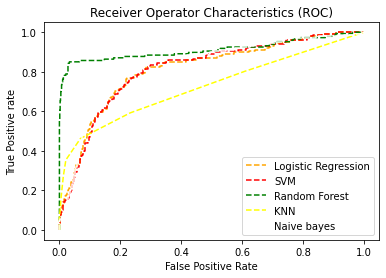

In [65]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

#  #11: CONCLUSION & PROJECT RECAP

In [66]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       853
           1       0.90      0.78      0.83       147

    accuracy                           0.95      1000
   macro avg       0.93      0.88      0.90      1000
weighted avg       0.95      0.95      0.95      1000



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

